## Overview

Overview text

## Business Problem

Business Problem text

## Data Understanding

Data Understadning text

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm

In [10]:
#Bringing in our target variable data set 
df_FF = pd.read_csv("../Data/Federal_Funds_Rate.csv")
df_FF['DATE'] = pd.to_datetime(df_FF.DATE)

## EDA and Visualizations

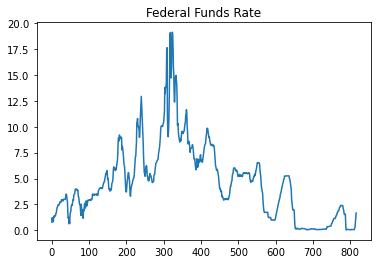

In [11]:
#Visualizing the target variable
fig, ax = plt.subplots()
ax.plot(df_FF.FEDFUNDS)
ax.set_title("Federal Funds Rate");

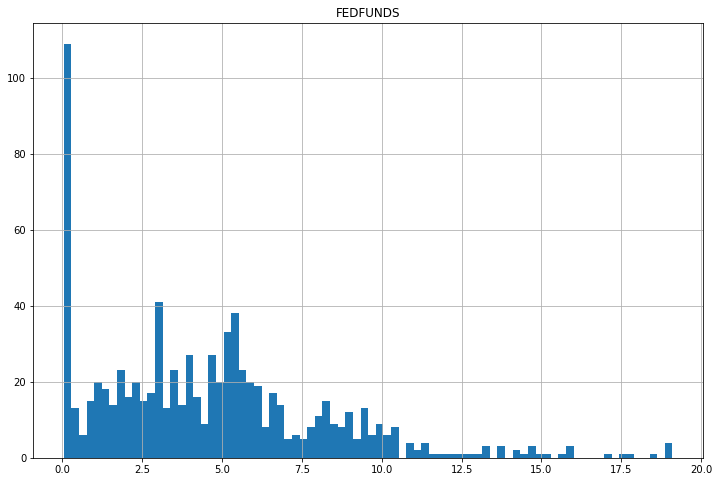

In [12]:
#Another histogram visualization, showing the frequency of each level of interest rates 
df_FF.hist(figsize = (12,8), bins=80);

In [13]:
df_FF

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
812,2022-03-01,0.20
813,2022-04-01,0.33
814,2022-05-01,0.77
815,2022-06-01,1.21


In [14]:
df_FF.set_index('DATE', inplace=True)

In [15]:
### need to full years to properly graph annual plot
df_FF_fullyears = df_FF.loc['1955-01-01':'2021-12-01']
df_FF_fullyears

,FEDFUNDS
DATE,
1955-01-01,1.39
1955-02-01,1.29
1955-03-01,1.35
1955-04-01,1.43
1955-05-01,1.43
...,...
2021-08-01,0.09
2021-09-01,0.08
2021-10-01,0.08


In [16]:
year_groups = df_FF_fullyears.groupby(pd.Grouper(freq = 'A'))
year_groups

In [17]:
FF_annual = pd.DataFrame()

for yr, group in year_groups:
    FF_annual[yr.year] = pd.Series(group.values.ravel())

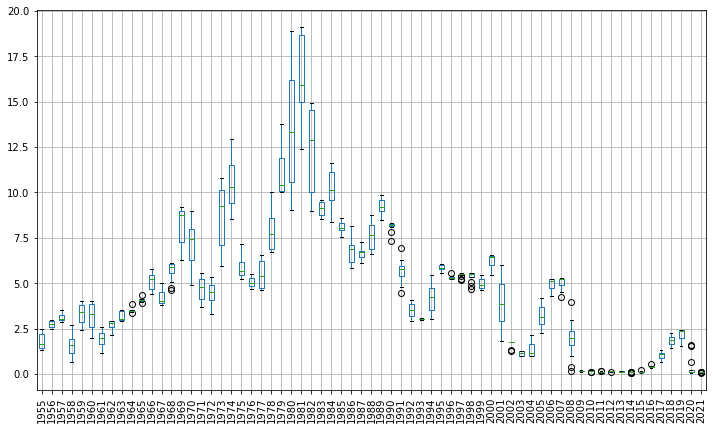

In [18]:
FF_annual.boxplot(figsize = (12,7))
plt.xticks(rotation=90);